
# Analisys of sirenes data

In [13]:
FROM_CACHE=True
%run "../utils/wrap_text.ipynb"

%run "../prepare/prepare_map_hautegaronne_postalcodes.ipynb"
# import Haute-Garonne sirenes
%run "../prepare/prepare_companies_sirene_registry.ipynb"

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cv2

plt.style.use('ggplot')


(from cache) gdf_hautegaronne_postalcodes: 70 postalcodes


(from cache) df_communes_haute_garonne: 600 communes
(from cache) df_sirenes: 0 companies


### Data period in years

In [2]:
df_sirenes['year'] = df_sirenes['year'].apply(str)

In [3]:
df_sirenes = df_sirenes.drop(df_sirenes[df_sirenes['year'] == 'nan'].index)
df_sirenes['year'] = df_sirenes['year'].apply(lambda year:int(float(year)))

In [4]:
print("period: from {} to {}".format(df_sirenes['year'].min(),df_sirenes['year'].max()))

period: from nan to nan


## Companies creation

### Data

In [5]:
period_start_year = 1900
period_end_year = 2020

#### Split between Toulouse and outside

In [6]:
toulouse_metropolis_postalcodes = [31003, 31022, 31032, 31044, 31053, 31056, 31069, 31088, 31091, 31116, 31149, 31150, 31157, 31163, 31182, 31184, 31186, 31205, 31230, 31282, 31293, 31351, 31352, 31355, 31389, 31417, 31418, 31445, 31467, 31488, 31490, 31506, 31541, 31555, 31557, 31561, 31588, \
                                   31000,31100,31200,31300,31400,31500, 31770, 31670, 31240, 31140, 31130, 31700]

df_sirenes_toulouse = df_sirenes.loc[toulouse_metropolis_postalcodes,]
df_sirenes_other = df_sirenes.drop(df_sirenes_toulouse.index)

#### All times companies creation

In [7]:
# global view
sr_sirenes_by_years = df_sirenes[(df_sirenes['year'] > period_start_year) &\
                                 (df_sirenes['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years.name = 'count'

# toulouse companies creations
sr_sirenes_by_years_toulouse = df_sirenes_toulouse[(df_sirenes_toulouse['year'] > period_start_year) &\
                                                   (df_sirenes_toulouse['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years_toulouse.name = 'count'

# others locations companies creations
sr_sirenes_by_years_other = df_sirenes_other[(df_sirenes_other['year'] > period_start_year) &\
                                             (df_sirenes_other['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years_other.name = 'count'

# all times creation count
toulouse_companies_creation_count = sr_sirenes_by_years_toulouse.sum()
other_companies_creation_count = sr_sirenes_by_years_other.sum()

#### Companies creations after 1980

In [8]:
recent_period_start_year = 1980

# recent global view
sr_sirenes_by_years_recent = df_sirenes[(df_sirenes['year'] > recent_period_start_year) &\
                                        (df_sirenes['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years_recent.name = 'count'

# recent toulouse companies creations
sr_sirenes_by_years_toulouse_recent = df_sirenes_toulouse[(df_sirenes_toulouse['year'] > recent_period_start_year) &\
                                                          (df_sirenes_toulouse['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years_toulouse_recent.name = 'count'

# recent others locations companies creations
sr_sirenes_by_years_other_recent = df_sirenes_other[(df_sirenes_other['year'] > recent_period_start_year) &\
                                                    (df_sirenes_other['year'] < period_end_year)].groupby('year')['siren'].count()
sr_sirenes_by_years_other_recent.name = 'count'

# recents creation counts
toulouse_companies_creation_count_from_1980 = sr_sirenes_by_years_toulouse_recent.sum()
other_companies_creation_count_from_1980 = sr_sirenes_by_years_other_recent.sum()

#### Companies before 1980

In [9]:
# old creation count
toulouse_companies_creation_count_before_1980 = toulouse_companies_creation_count - toulouse_companies_creation_count_from_1980
other_companies_creation_count_before_1980 = other_companies_creation_count - other_companies_creation_count_from_1980

### Visualization

#### 120 years of companies creation ...

In [10]:
def is_metropolis(value):
    if value in toulouse_metropolis_postalcodes:
        return True
    else:
        return False
    

In [11]:
gdf_hautegaronne_postalcodes['is_metropolis'] = gdf_hautegaronne_postalcodes['ID'].apply(is_metropolis)

ValueError: Axis limits cannot be NaN or Inf

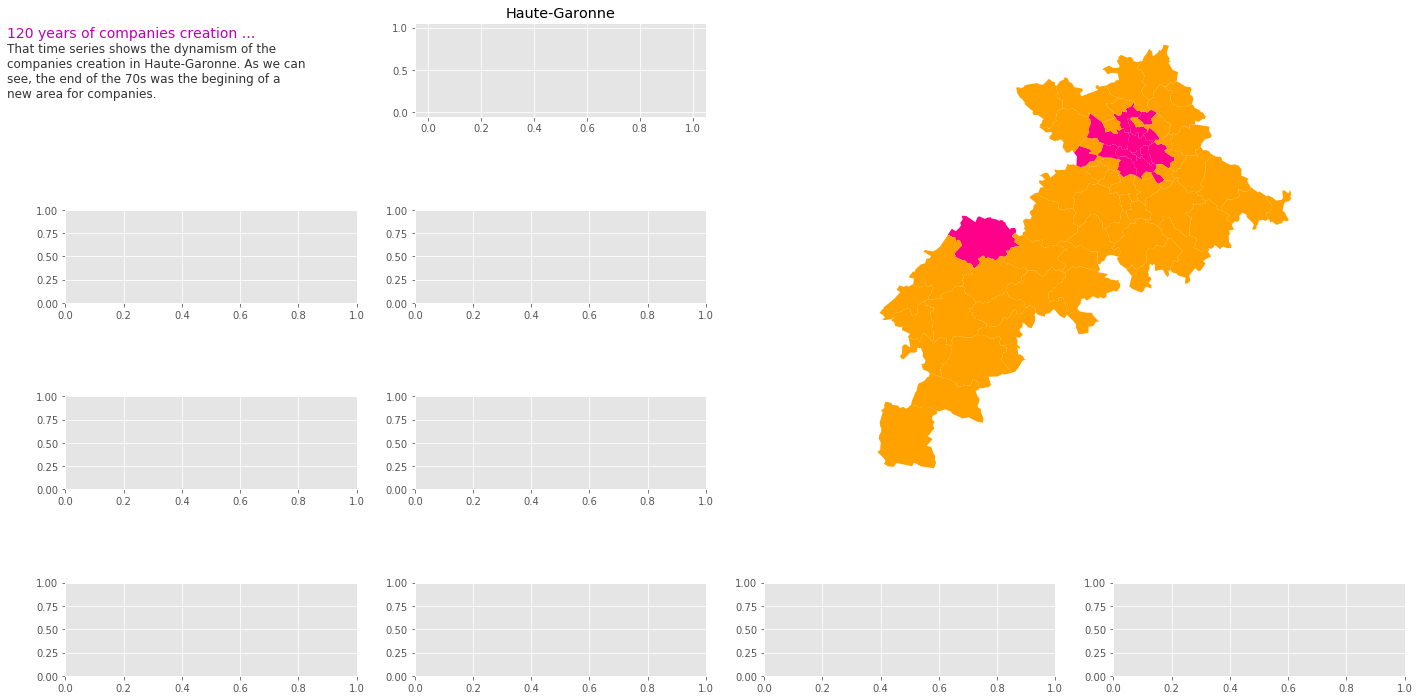

In [12]:
# set curve plots limits 
ymax = sr_sirenes_by_years.max()
ymax_recent = sr_sirenes_by_years_recent.max()

# create the figure and the axes
fig, axs = plt.subplots(4, 4, figsize=(24, 12))
plt.subplots_adjust(hspace = 1.0)

# set text positions
text_width = 300
all_text_x = -0.2
title_text_y = 0.9
content_text_y = 0.8

####################################################
#        Haute-garonne map
####################################################
gs = axs[0, 2].get_gridspec()
# remove the blank axes
for i in range(3):
    for j in range(2, 4):        
        axs[i, j].remove()

cmap = ListedColormap(['#ffa200', '#ff008a'])
axbig = fig.add_subplot(gs[0:3,2:4])
axbig = gdf_hautegaronne_postalcodes.plot(ax=axbig, column='is_metropolis', cmap=cmap)
# Turns off-grid on the left Axis.
axbig.grid(False)
axbig.axis('off')


####################################################
#        120 years of companies creation ...
####################################################
row_idx = 0
axs[row_idx,0].axis('off')

axs[row_idx,0].text(all_text_x, title_text_y, '120 years of companies creation ...',
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=14, color='#bd00b6',
        transform=axs[row_idx,0].transAxes)

text = ("That time series shows the dynamism of the companies creation in Haute-Garonne. " \
        "As we can see, the end of the 70s was the begining of a new area for companies.")

wtxt = WrapText(all_text_x, content_text_y, text, width=text_width, ha='left', va='top', color='#333333', fontsize=12, clip_on=False)
axs[row_idx,0].add_artist(wtxt)

axs[row_idx,1].set_title('Haute-Garonne')
axs[row_idx,1].plot(sr_sirenes_by_years, linewidth=2, color='#bd00b6')

# axs[row_idx,2].set_title('Toulouse métropole')
# axs[row_idx,2].plot(sr_sirenes_by_years_toulouse, linewidth=2, color='#ff008a')

# axs[row_idx,3].set_title('Outside of metropolis')
# axs[row_idx,3].plot(sr_sirenes_by_years_other, linewidth=2, color='#ffa200')

# for j in range(1, len(axs[row_idx])):
#     axs[row_idx,j].set_ylim(0, ymax)
#     axs[row_idx,j].set_facecolor('#fcfcfc')
axs[row_idx,1].set_ylim(0, ymax)
axs[row_idx,1].set_facecolor('#fcfcfc')

axs[row_idx,2].axis('off')
axs[row_idx,3].axis('off')
####################################################
#        ... with a disparity since 1980 ...
####################################################
row_idx = 1
#img = cv2.imread(IMAGE_WARNING, cv2.IMREAD_UNCHANGED)
axs[row_idx,0].axis('off')
#axs[row_idx,0].imshow(img)

axs[row_idx,0].axis('off')
axs[row_idx,0].set_xlim(0, 1)
axs[row_idx,0].set_ylim(0, 1)

axs[row_idx,0].text(all_text_x, title_text_y, '... with a misleading period disparity since 1980 ...',
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=14, color='#bd00b6',
        transform=axs[row_idx,0].transAxes)

text = ("The statistics of Insee shows a big difference before and after 1980."
        "But, that's only because the Sirene was created in 1973.")

wtxt = WrapText(all_text_x, content_text_y, text, width=text_width, ha='left', va='top', color='#333333', fontsize=12, clip_on=False)
axs[row_idx,0].add_artist(wtxt)

# values for bar plot
labels = ['Before 1980', 'After 1980']
toulouse_values = [toulouse_companies_creation_count_before_1980, toulouse_companies_creation_count_from_1980]
other_values = [other_companies_creation_count_before_1980, other_companies_creation_count_from_1980]

x = np.arange(len(labels))  # the label locations
width = 0.35

rects1 = axs[row_idx,1].bar(x - width/2, toulouse_values, width, label='Toulouse', color='#ff008a')
rects2 = axs[row_idx,1].bar(x + width/2, other_values, width, label='Outside of Toulouse', color='#ffa200')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[row_idx,1].set_xticks(x)
axs[row_idx,1].set_xticklabels(labels)
axs[row_idx,1].set_facecolor('#fcfcfc') 
axs[row_idx,1].legend()

axs[row_idx,2].axis('off')

axs[row_idx,3].axis('off')


####################################################
#        ... but a real geographic one !
####################################################
row_idx = 2

#img = cv2.imread(IMAGE_WARNING, cv2.IMREAD_UNCHANGED)
axs[row_idx,0].axis('off')
#axs[row_idx,0].imshow(img)

axs[row_idx,0].axis('off')
axs[row_idx,0].set_xlim(0, 1)
axs[row_idx,0].set_ylim(0, 1)

axs[row_idx,0].text(all_text_x, title_text_y, '... but a real geographic one !',
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=14, color='#bd00b6',
        transform=axs[row_idx,0].transAxes)

text = ("Companies creation doesn't evolve since 10 years."
        "Since the 2010 economic crisis, the rest of the region seems asleep.")

wtxt = WrapText(all_text_x, content_text_y, text, width=text_width, ha='left', va='top', color='#333333', fontsize=12, clip_on=False)
axs[row_idx,0].add_artist(wtxt)

axs[row_idx,1].set_facecolor('#fcfcfc')
axs[row_idx,1].plot(sr_sirenes_by_years_toulouse_recent, linewidth=2, color='#ff008a')
axs[row_idx,1].plot(sr_sirenes_by_years_other_recent, linewidth=2, color='#ffa200')

axs[row_idx,2].axis('off')

axs[row_idx,3].axis('off')
####################################################
#        ... with a disparity since 1980 ...
####################################################
row_idx = 3

axs[row_idx,0].axis('off')
axs[row_idx,0].set_xlim(0, 1)
axs[row_idx,0].set_ylim(0, 1)

axs[row_idx,0].text(all_text_x, title_text_y, 'Companies creation since 2000',
        horizontalalignment='left',
        verticalalignment='center',
        fontsize=14, color='#bd00b6',
        transform=axs[row_idx,0].transAxes)

text = ("Lorem Ipsum is simply dummy text of the printing and typesetting industry. " \
        "Lorem Ipsum has been the industry''s standard dummy text ever since the 1500s, " \
        "when an unknown printer took a galley of type and scrambled it to make a type specimen book. ")

wtxt = WrapText(all_text_x, content_text_y, text, width=200, ha='left', va='top', color='#333333', fontsize=12, clip_on=False)

axs[row_idx,0].add_artist(wtxt)
axs[row_idx,1].plot(sr_sirenes_by_years_recent, linewidth=2, color='#bd00b6')
axs[row_idx,2].plot(sr_sirenes_by_years_toulouse_recent, linewidth=2, color='#ff008a')
axs[row_idx,3].plot(sr_sirenes_by_years_other_recent, linewidth=2, color='#ffa200')

for j in range(1, len(axs[1])):
    axs[row_idx,j].set_ylim(0, ymax_recent)
    axs[row_idx,j].set_facecolor('#fcfcfc')    
    axs[row_idx,j].set_xticks([1980,1990,2000,2010,2020])
    
    for tick in axs[row_idx,j].get_xticklabels():
        tick.set_rotation(45)

####################################################
#        ... the end.
####################################################
plt.show()

## Search for closed companies

In [ ]:


# values for bar plot
labels = ['Before 1980', 'After 1980']
toulouse_values = [toulouse_companies_creation_count_before_1980, toulouse_companies_creation_count_from_1980]
other_values = [other_companies_creation_count_before_1980, other_companies_creation_count_from_1980]

x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, toulouse_values, width, label='Toulouse', color='#ff008a')
rects2 = ax.bar(x + width/2, other_values, width, label='Outside of Toulouse', color='#ffa200')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_facecolor('#fcfcfc') 
ax.legend()